# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance df.


The data was scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **July 27th, 2021**, see **scraping_movie_df.py** for scraper code. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
df = pd.read_csv('movie_data.csv')

# Explore and Clean the Data

In [4]:
df.shape

(6175, 6)

In [5]:
df.sample(5)

,Rank,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
5672,"5,673","Oct 7, 2014",Doc Holliday's Revenge,"1,000,000",0,0
3183,"3,184","Mar 6, 1987",Lethal Weapon,"15,000,000","65,192,350","120,192,350"
3192,"3,193","Aug 9, 2018",BlacKkKlansman,"15,000,000","49,275,340","93,411,426"
5429,"5,430","Jun 26, 1998",Buffalo '66,"1,500,000","2,380,606","2,380,606"
4437,"4,438","Mar 15, 1993",Only the Strong,"6,000,000","3,273,588","3,273,588"


In [6]:
df.tail()

,Rank,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
6170,"6,171",Unknown,Red 11,"7,000",0,0
6171,"6,172","Apr 2, 1999",Following,"6,000","48,482","240,495"
6172,"6,173","Jul 13, 2005",Return to the Land of Wonders,"5,000","1,338","1,338"
6173,"6,174","Sep 29, 2015",A Plague So Pleasant,"1,400",0,0
6174,"6,175","Aug 5, 2005",My Date With Drew,"1,100","181,041","181,041"


In [7]:
print(f'Any NA values among the data? {df.isna().values.any()}')

# but there is 'Unknown' data in the Release Date column; for now, we remove the data
df = df[df['Release Date'] != 'Unknown']

Any NA values among the data? False


In [8]:
print(f'Any duplicates? {df.duplicated().values.any()}')

duplicated_rows = df[df.duplicated()]
print(f'Number of duplicates: {len(duplicated_rows)}')

Any duplicates? False
Number of duplicates: 0


In [9]:
# show NA values and data types per column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6061 entries, 0 to 6174
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Rank               6061 non-null   object
 1   Release Date       6061 non-null   object
 2   Movie              6061 non-null   object
 3   Production Budget  6061 non-null   object
 4   Domestic Gross     6061 non-null   object
 5   Worldwide Gross    6061 non-null   object
dtypes: object(6)
memory usage: 331.5+ KB


### Data Type Conversions

In [10]:
# remove the coma
chars_to_remove = [',']
columns_to_clean = ['Production Budget', 
                    'Domestic Gross',
                    'Worldwide Gross']

for col in columns_to_clean:
    for char in chars_to_remove:
        # replace each character with an empty string
        df[col] = df[col].astype(str).str.replace(char, "")
    # convert column to a numeric data type
    df[col] = pd.to_numeric(df[col])

In [11]:
df.head()

,Rank,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
0,1,"Apr 23, 2019",Avengers: Endgame,400000000,858373000,2797800564
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802
2,3,"Apr 22, 2015",Avengers: Age of Ultron,365000000,459005868,1395316979
3,4,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817
4,5,"Apr 25, 2018",Avengers: Infinity War,300000000,678815482,2044540523


In [12]:
df['Release Date'] = pd.to_datetime(df['Release Date'], format='%b %d, %Y')
df.head()

,Rank,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
0,1,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802
2,3,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979
3,4,2015-12-16,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817
4,5,2018-04-25,Avengers: Infinity War,300000000,678815482,2044540523


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6061 entries, 0 to 6174
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Rank               6061 non-null   object        
 1   Release Date       6061 non-null   datetime64[ns]
 2   Movie              6061 non-null   object        
 3   Production Budget  6061 non-null   int64         
 4   Domestic Gross     6061 non-null   int64         
 5   Worldwide Gross    6061 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 331.5+ KB


### Descriptive Statistics

In [14]:
df.describe()

,Production Budget,Domestic Gross,Worldwide Gross
count,"6,061.00","6,061.00","6,061.00"
mean,"31,894,054.35","41,944,626.40","92,542,284.83"
std,"42,010,146.90","69,313,828.86","180,266,580.11"
min,"1,100.00",0.00,0.00
25%,"5,000,000.00","1,632,000.00","4,559,569.00"
50%,"17,000,000.00","17,259,427.00","28,296,983.00"
75%,"40,000,000.00","52,000,688.00","97,413,527.00"
max,"400,000,000.00","936,662,225.00","2,845,899,541.00"


In [15]:
# lowest production budget

df[df['Production Budget'] == 1100.00]

,Rank,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
6174,"6,175",2005-08-05,My Date With Drew,1100,181041,181041


In [16]:
# highest production budget

df[df['Production Budget'] == 400000000]

,Rank,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
0,1,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564


# Investigating the Zero Revenue Films

In [17]:
zero_domestic = df[df['Domestic Gross'] == 0]
print(f'Number of films that grossed $0 domestically {len(zero_domestic)}')
zero_domestic.sort_values('Domestic Gross', ascending=False)

Number of films that grossed $0 domestically 527


,Rank,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
20,21,2021-09-30,No Time to Die,250000000,0,457
5535,"5,536",2004-06-18,Grand Theft Parsons,1200000,0,0
5509,"5,510",2015-01-13,Da Sweet Blood of Jesus,1250000,0,0
5508,"5,509",1941-10-28,How Green Was My Valley,1250000,0,0
5507,"5,508",2016-08-19,Bodom,1250000,0,726460
...,...,...,...,...,...,...
4199,"4,200",2017-12-28,Dvizhenie Vverkh,7800000,0,61925449
4196,"4,197",2019-06-21,Burn Your Maps,8000000,0,0
4195,"4,196",2016-05-06,Code of Honor,8000000,0,0
4194,"4,195",2009-12-18,Christmas in Beverly Hills,8000000,0,0


In [18]:
zero_worldwide = df[df['Worldwide Gross'] == 0]
print(f'Number of films that grossed $0 worldwide {len(zero_worldwide)}')
zero_worldwide.sort_values('Production Budget', ascending=False)

Number of films that grossed $0 worldwide 312


,Rank,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
74,75,2021-10-28,Eternals,200000000,0,0
148,149,2021-09-30,Dune,165000000,0,0
215,216,2021-01-01,Red Notice,150000000,0,0
216,217,2022-02-04,Moonfall,150000000,0,0
241,242,2021-11-18,Top Gun: Maverick,140000000,0,0
...,...,...,...,...,...,...
6149,"6,150",2013-01-04,All Superheroes Must Die,20000,0,0
6150,"6,151",2015-04-21,The Front Man,20000,0,0
6151,"6,152",2011-11-25,The Ridges,17300,0,0
6164,"6,165",2015-05-19,Family Motocross,10000,0,0


### US and worldwide Gross (Filtering on Multiple Conditions)

In [19]:
international_releases = df.loc[(df['Domestic Gross'] == 0) & 
                                  (df['Worldwide Gross'] != 0)]
print(f'Number of international releases: {len(international_releases)}')
international_releases.head()

Number of international releases: 215


,Rank,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
20,21,2021-09-30,No Time to Die,250000000,0,457
73,74,2020-09-04,Mulan,200000000,0,69965374
163,164,2019-11-01,The Irishman,159000000,0,910234
648,649,2019-11-01,The Aeronauts,80000000,0,6628720
658,659,2012-10-17,AstÃ©rix et ObÃ©lix: Au service de Sa MajestÃ©,77600000,0,60680125


In [20]:
# trying out query

international_releases = df.query('`Domestic Gross` == 0 and `Worldwide Gross` != 0')
print(f'Number of international releases: {len(international_releases)}')
international_releases.tail()

Number of international releases: 215


,Rank,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
6035,"6,036",2015-10-23,Lumea e a mea,168000,0,29678
6044,"6,045",2015-12-03,Speak No Evil,150000,0,32927
6090,"6,091",2013-04-11,Absentia,70000,0,8555
6140,"6,141",2015-07-17,Exeter,25000,0,489792
6147,"6,148",2019-08-09,Socrates,20000,0,849


### Unreleased Films

In [21]:
# Date of Data Collection
scrape_date = pd.Timestamp('2021-08-1')

In [22]:
future_releases = df[df['Release Date'] >= scrape_date]
print(f'Number of unreleased movies: {len(future_releases)}')
future_releases

Number of unreleased movies: 10


,Rank,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
20,21,2021-09-30,No Time to Die,250000000,0,457
74,75,2021-10-28,Eternals,200000000,0,0
148,149,2021-09-30,Dune,165000000,0,0
216,217,2022-02-04,Moonfall,150000000,0,0
241,242,2021-11-18,Top Gun: Maverick,140000000,0,0
714,715,2022-01-07,The 355,75000000,0,0
808,809,2021-08-19,Reminiscence,67972729,0,0
1629,"1,630",2022-12-16,Heaven and Hell,40000000,0,0
1630,"1,631",2021-11-26,Soggy Bottom,40000000,0,0
3662,"3,663",2021-10-09,Untitled Leonid Brezhnev Movie,11200000,0,0


In [23]:
# exclude future releases
data_clean = df.drop(future_releases.index)

In [24]:
# difference is 10 rows
df.shape[0] - data_clean.shape[0]

10

### Films that Lost Money

In [25]:
money_losing = data_clean.loc[data_clean['Production Budget'] > data_clean['Worldwide Gross']]
len(money_losing)/len(data_clean)

0.3615931251032887

In [26]:
# again, trying out query; same approach
money_losing = data_clean.query('`Production Budget` > `Worldwide Gross`')
money_losing.shape[0]/data_clean.shape[0]

0.3615931251032887

# Seaborn: Bubble Charts

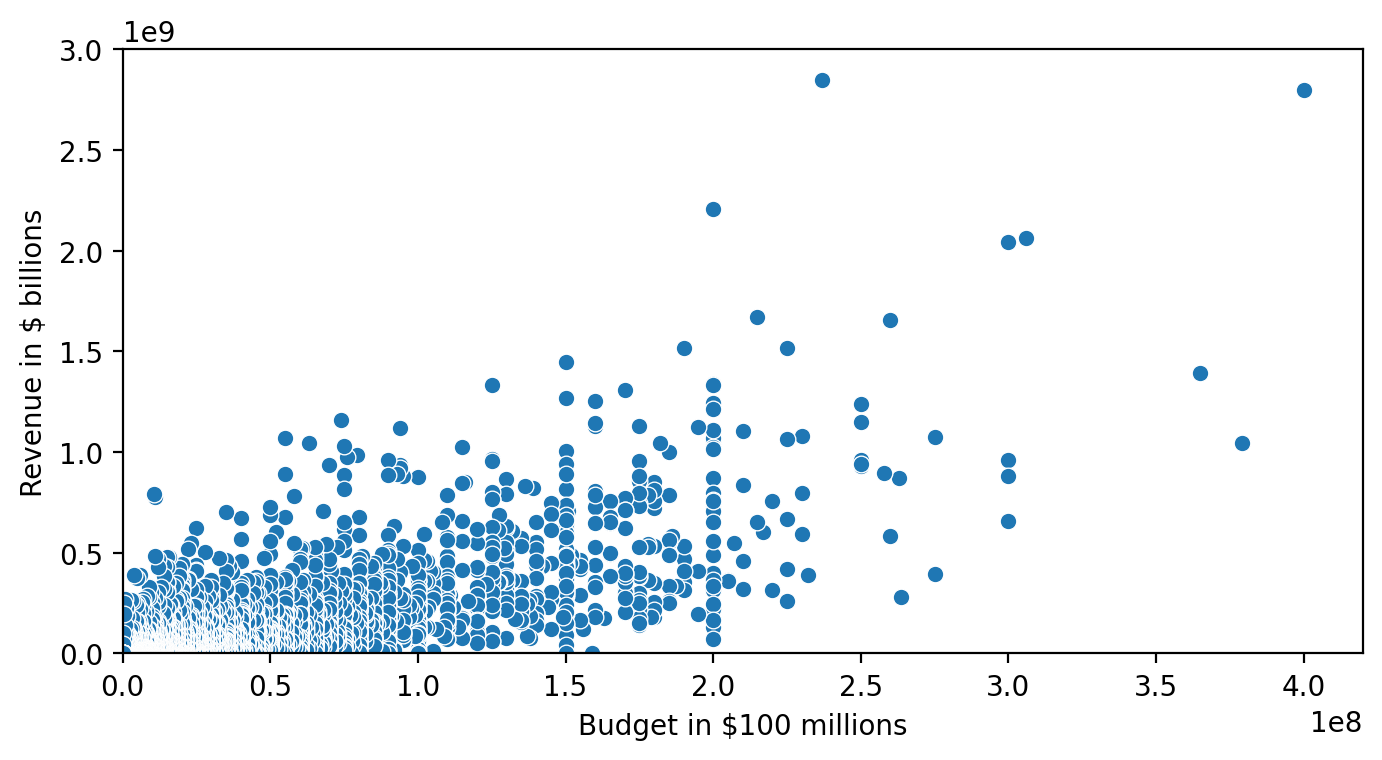

In [27]:
plt.figure(figsize=(8,4), dpi=200)

ax = sns.scatterplot(data=data_clean,
                     x='Production Budget', 
                     y='Worldwide Gross')

ax.set(ylim=(0, 3000000000),
       xlim=(0, 420000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')

plt.show()

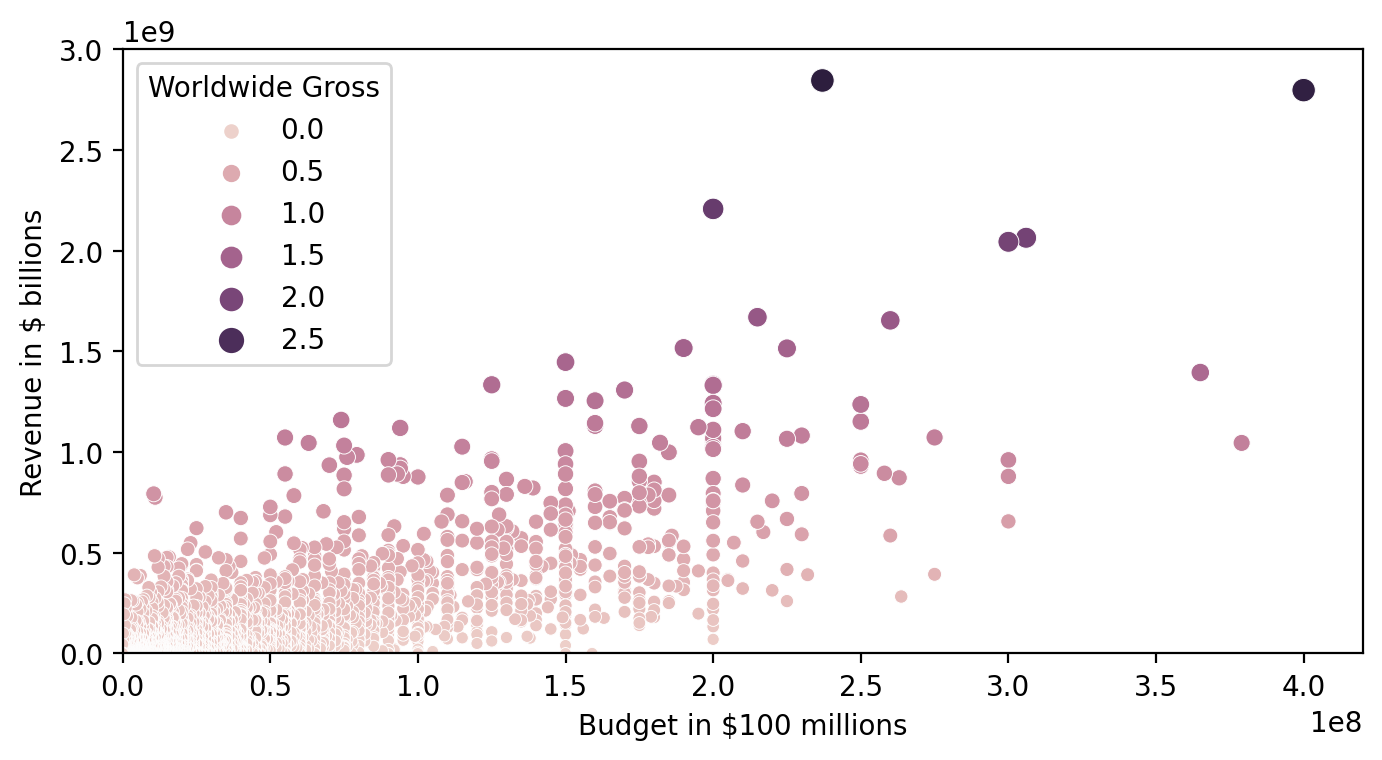

In [28]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=data_clean,
                     x='Production Budget', 
                     y='Worldwide Gross',
                     hue='Worldwide Gross', # change colour
                     size='Worldwide Gross',) # change size of dot

ax.set(ylim=(0, 3000000000),
       xlim=(0, 420000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)

plt.show()

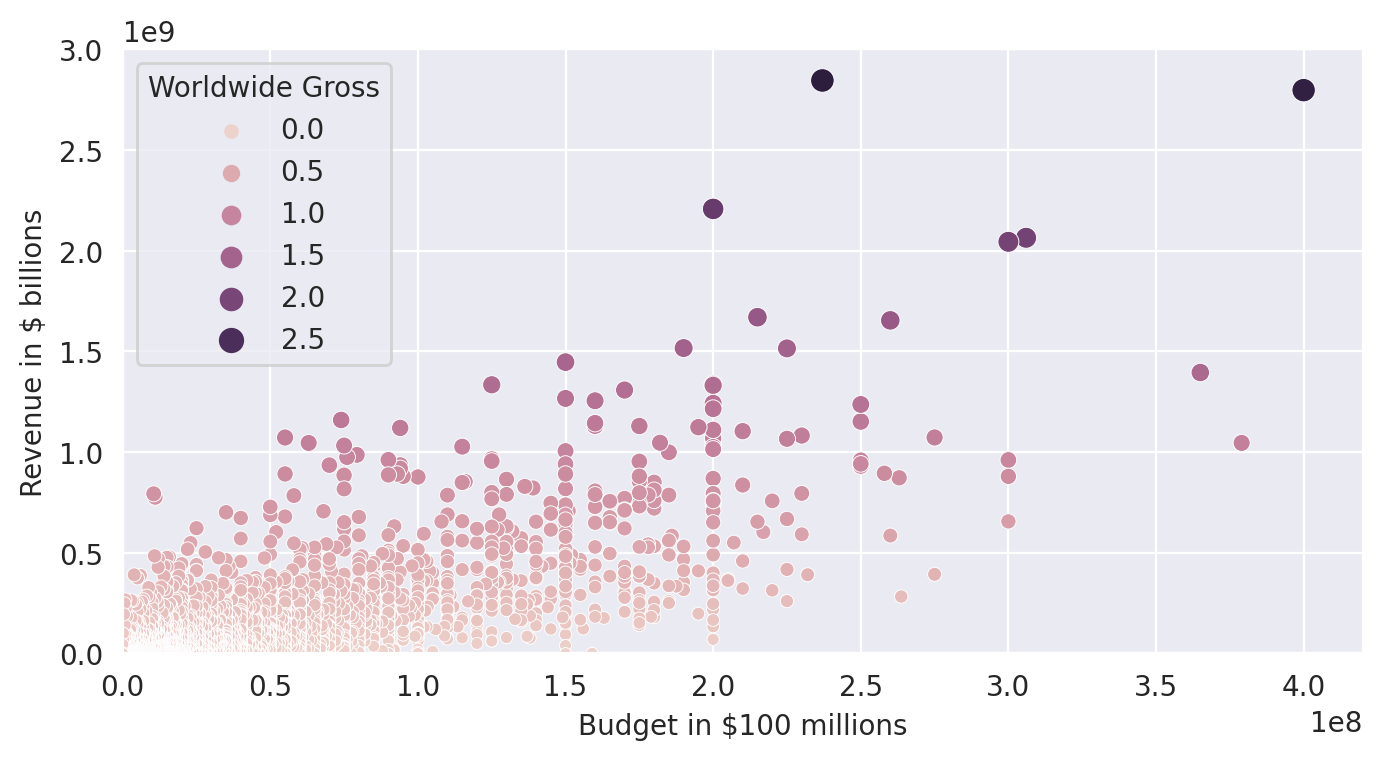

In [29]:
plt.figure(figsize=(8,4), dpi=200)

# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='Production Budget', 
                       y='Worldwide Gross',
                       hue='Worldwide Gross',
                       size='Worldwide Gross')

  ax.set(ylim=(0, 3000000000),
        xlim=(0, 420000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

### Plotting Movie Releases over Time

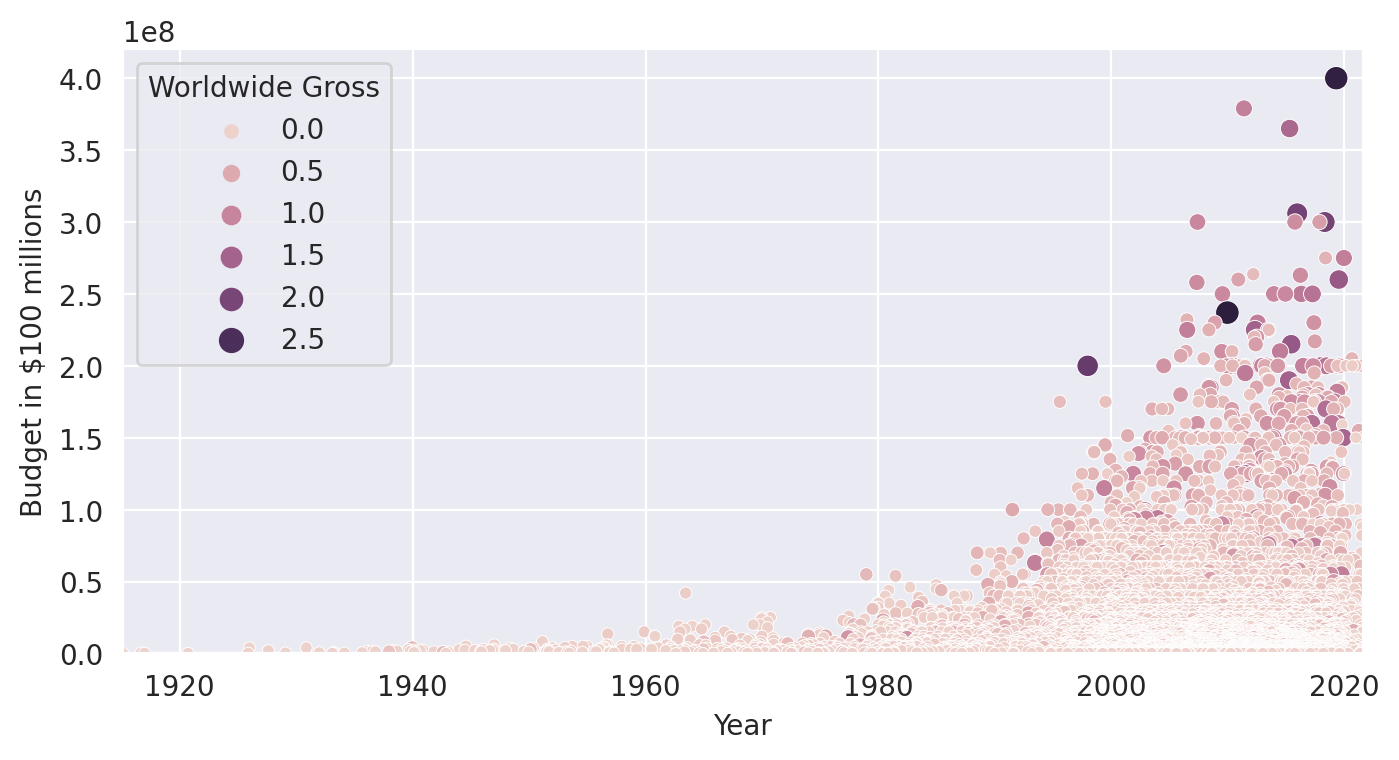

In [30]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean, 
                    x='Release Date', 
                    y='Production Budget',
                    hue='Worldwide Gross',
                    size='Worldwide Gross',)

    ax.set(ylim=(0, 420000000),
           xlim=(data_clean['Release Date'].min(), data_clean['Release Date'].max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')


# Converting Years to Decades Trick

In [31]:
dt_index = pd.DatetimeIndex(data_clean['Release Date'])
years = dt_index.year

In [32]:
# convert years to decades
decades = years//10*10
data_clean['Decade'] = decades

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

In [33]:
old_films = data_clean[data_clean.Decade <= 1960]
new_films = data_clean[data_clean.Decade > 1960]

In [34]:
old_films.describe()

,Production Budget,Domestic Gross,Worldwide Gross,Decade
count,166.00,166.00,166.00,166.00
mean,"4,370,672.21","21,557,707.11","28,989,292.28","1,949.46"
std,"5,553,038.36","32,341,639.69","53,484,813.68",12.52
min,"60,000.00",0.00,0.00,"1,910.00"
25%,"1,250,000.00","3,550,000.00","4,000,000.00","1,940.00"
50%,"2,673,000.00","9,211,000.00","9,425,000.00","1,950.00"
75%,"5,000,000.00","27,400,000.00","31,384,083.50","1,960.00"
max,"42,000,000.00","198,680,470.00","390,525,192.00","1,960.00"


In [35]:
old_films.sort_values('Production Budget', ascending=False).head()

,Rank,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Decade
1423,"1,424",1963-06-12,Cleopatra,42000000,57000000,71000000,1960
2469,"2,470",1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
2704,"2,705",1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
2760,"2,761",1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
2802,"2,803",1969-04-01,Sweet Charity,20000000,8000000,8000000,1960


# Seaborn Regression Plots

<AxesSubplot:xlabel='Production Budget', ylabel='Worldwide Gross'>

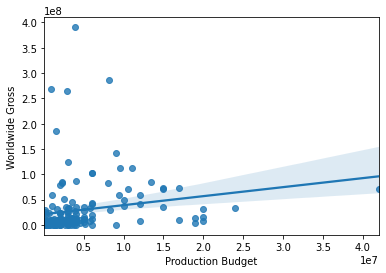

In [36]:
sns.regplot(data=old_films, 
            x='Production Budget',
            y='Worldwide Gross')

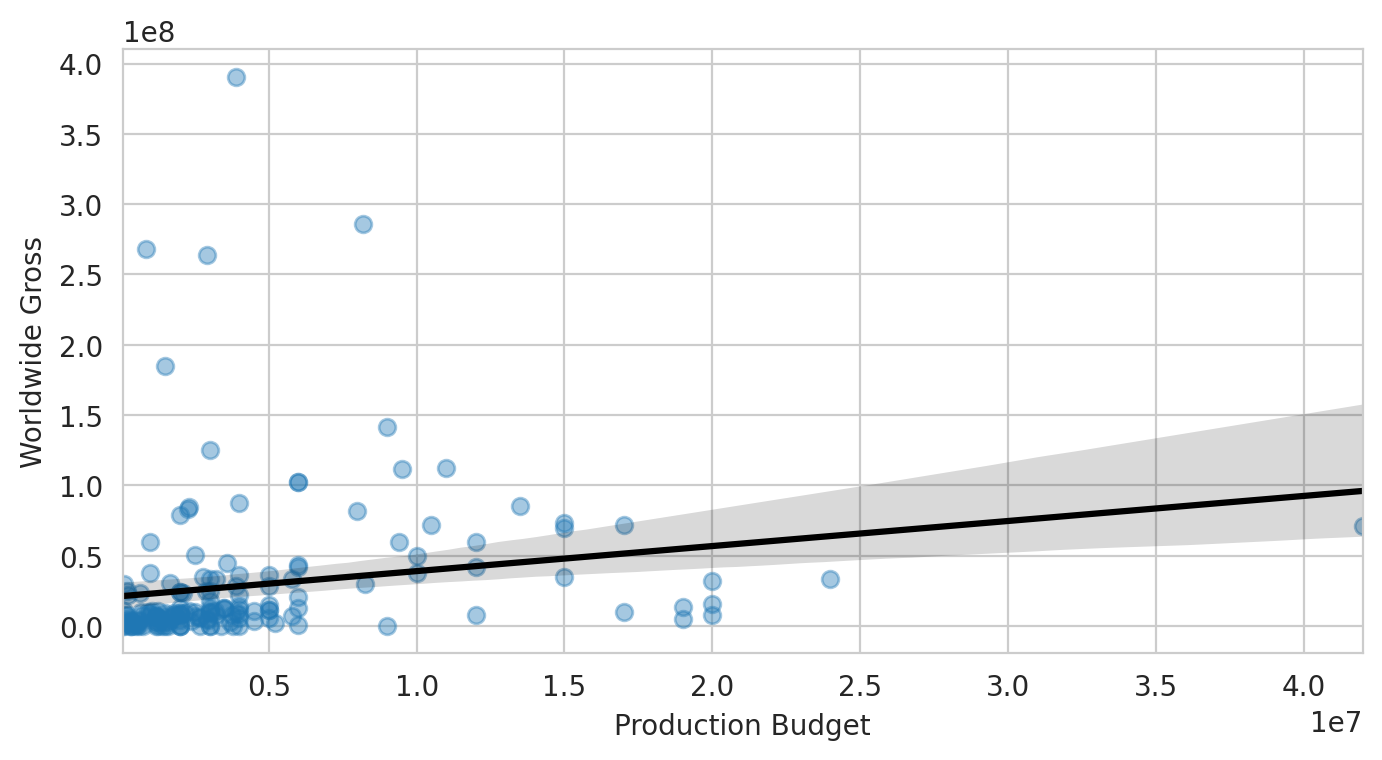

In [37]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='Production Budget', 
            y='Worldwide Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

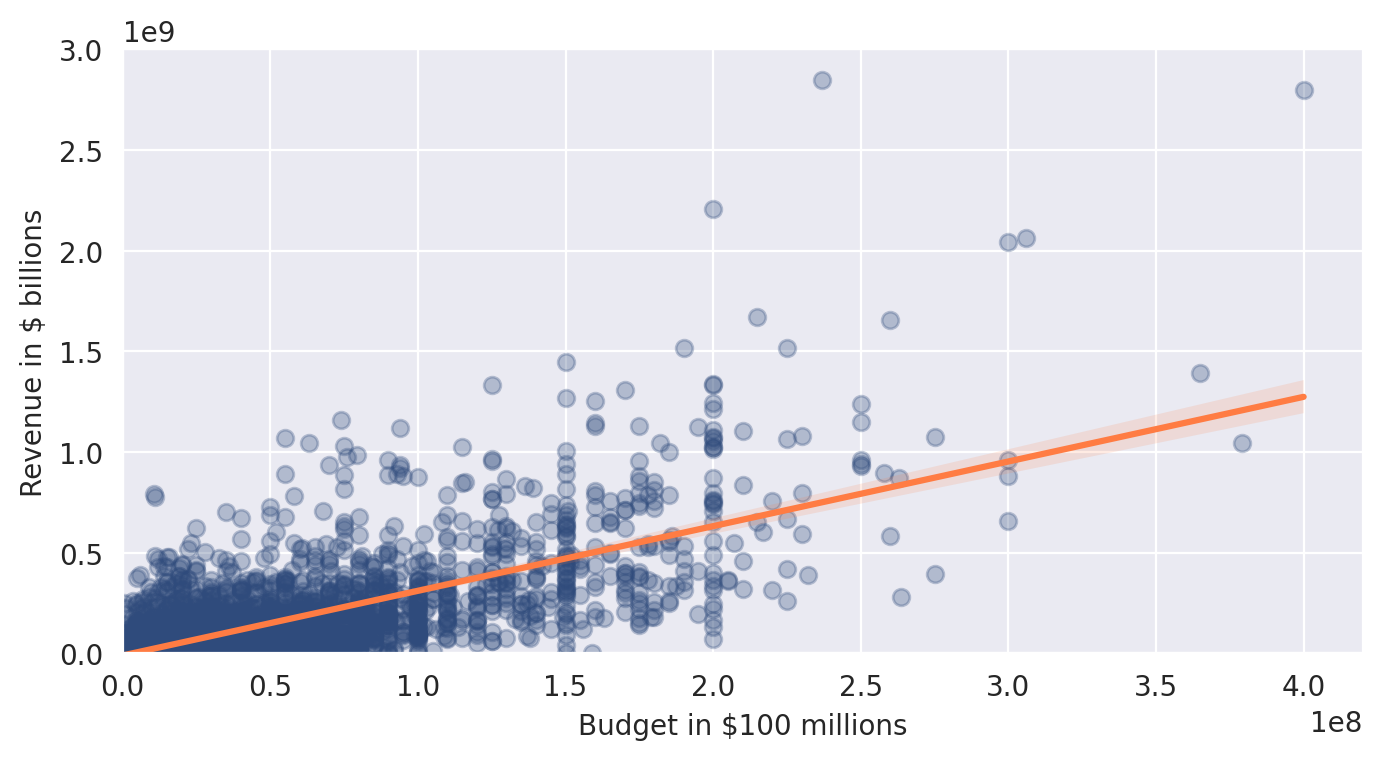

In [38]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='Production Budget',
                   y='Worldwide Gross',
                   color='#2f4b7c',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': '#ff7c43'})
  
  ax.set(ylim=(0, 3000000000),
         xlim=(0, 420000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions')

# Run Your Own Regression with scikit-learn

The Linear Model:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [39]:
# create regression object
regression = LinearRegression()

In [40]:
# explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['Production Budget'])

# response Variable or Target
y = pd.DataFrame(new_films, columns=['Worldwide Gross'])

In [41]:
# Find the best-fit line
regression.fit(X, y)

LinearRegression()

In [42]:
# Theta zero
regression.intercept_

array([-9978512.35836601])

In [43]:
# Theta one
regression.coef_

array([[3.21141633]])

In [44]:
# R-squared
regression.score(X, y)

0.5501872329074502

In [45]:
X = pd.DataFrame(old_films, columns=['Production Budget'])
y = pd.DataFrame(old_films, columns=['Worldwide Gross'])
regression.fit(X, y)
print(f'The slope coefficient is: {regression.coef_[0]}')
print(f'The intercept is: {regression.intercept_[0]}')
print(f'The r-squared is: {regression.score(X, y)}')

The slope coefficient is: [1.78221899]
The intercept is: 21199797.257934555
The r-squared is: 0.03423911309932359


# Use the Model to Make a Prediction

Linear Model:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [46]:
# example budget

budget = 320000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $320 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $320 film is around $592000000.0.
